**Importing necessary library**

In [1]:
imp_feature = ['uid3_count_dist', 'feat1', 'TransactionAmt', 'feat2', 'card1_count_dist', 'card2_count_dist', 'addr1_count_dist', 'uid_count_dist', 'uid2_count_dist', 'Transaction_hour', 'uid1_count_dist', 'P_emaildomain_count_dist', 'M_na', 'M_na_count_dist', 'D15_count_dist', 'Transaction_day_of_week', 'D1', 'card5_count_dist', 'dist1_count_dist', 'C13', 'D10_count_dist', 'id_20_count_dist', 'D4_count_dist', 'id_19_count_dist', 'C13_count_dist', 'D2_count_dist', 'id_31_count_dist', 'D1_count_dist', 'DeviceInfo_count_dist', 'R_emaildomain_count_dist', 'C1', 'uid4_count_dist', 'id_33_count_dist', 'V310_count_dist', 'C2', 'C1_count_dist', 'V307_count_dist', 'C14', 'C6', 'C2_count_dist', 'C14_count_dist', 'C6_count_dist', 'id_30_count_dist', 'D3_count_dist', 'V313_count_dist', 'D11_count_dist', 'D5_count_dist', 'id_05_count_dist', 'D9_count_dist', 'C11', 'dist2_count_dist', 'C9', 'V315_count_dist', 'id_13_count_dist', 'C9_count_dist', 'id_01_count_dist', 'V130_count_dist', 'M4_count_dist', 'C11_count_dist', 'V314_count_dist', 'M6_count_dist', 'M5_count_dist', 'card4_count_dist', 'V127_count_dist', 'V312_count_dist', 'D14_count_dist', 'V308_count_dist', 'C5', 'V283_count_dist', 'id_14_count_dist', 'V83_count_dist', 'M3_count_dist', 'C5_count_dist', 'V62_count_dist', 'id_18_count_dist', 'ProductCD_count_dist', 'V87_count_dist', 'V282_count_dist', 'V317_count_dist', 'D6_count_dist', 'card6_count_dist', 'V285_count_dist', 'V76_count_dist', 'card3_count_dist', 'id_02_count_dist', 'V45_count_dist', 'V143_count_dist', 'V38_count_dist', 'V131_count_dist', 'C10']


In [2]:
import pandas as pd
import numpy as np
import multiprocessing
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import gc
from time import time
import datetime
from tqdm import tqdm_notebook
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import roc_auc_score
warnings.simplefilter('ignore')
sns.set()
%matplotlib inline

**Importing datasets**

In [3]:
sub = pd.read_csv("../input/ieee-fraud-detection/sample_submission.csv")

In [4]:
sub.shape

(506691, 2)

In [5]:
train_id = pd.read_csv("../input/ieee-fraud-detection/train_identity.csv")
train_tr = pd.read_csv("../input/ieee-fraud-detection/train_transaction.csv")

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
train_id.head(5)

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [8]:
train_tr.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,M0,T,T,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [9]:
train_id.shape, train_tr.shape

((144233, 41), (590540, 394))

In [10]:
test_id = pd.read_csv("../input/ieee-fraud-detection/test_identity.csv")
test_tr = pd.read_csv("../input/ieee-fraud-detection/test_transaction.csv")

In [11]:
test_id.shape, test_tr.shape

((141907, 41), (506691, 393))

**Merging transaction and Identity **

In [12]:
train = pd.merge(train_tr, train_id, on='TransactionID', how='left')
test = pd.merge(test_tr, test_id, on='TransactionID', how='left')

del test_id, test_tr
del train_id, train_tr
gc.collect()

4

In [13]:
train.head(5)

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,13.0,13.0,NaN,NaN,NaN,0.0,T,T,T,M2,F,T,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0

**Negative Downsampling**

In [14]:
# Negative downsampling
train_pos = train[train['isFraud']==1]
train_neg = train[train['isFraud']==0]

train_neg = train_neg.sample(10*int(train_pos.shape[0] ), random_state=42)
train = pd.concat([train_pos,train_neg]).sort_index()

In [15]:
train_pos.shape, train_neg.shape

((20663, 434), (206630, 434))

In [16]:
l = 11*int(train_pos.shape[0])

In [17]:
train.shape

(227293, 434)

> From below we can see that there are a lot of features with almost 99% nan values

In [18]:
train.isna().sum()

TransactionID          0
isFraud                0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               3534
card3                581
card4                585
card5               1693
card6                583
addr1              28879
addr2              28879
dist1             138047
dist2             211218
P_emaildomain      35903
R_emaildomain     170097
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                   521
D2                109978
D3                102622
D4                 65134
D5                118791
D6                195741
D7                209529
D8                195014
D9                195014


> Sorting features on basis of TransactionDT

In [19]:
train = train.sort_values('TransactionDT')

In [20]:
train.shape

(227293, 434)

In [21]:
train.drop_duplicates(inplace=True)

In [22]:
train.shape

(227293, 434)

In [23]:
target = train["isFraud"]
train.drop(["isFraud"], axis=1, inplace=True)

**Taking all features**
> Initially I will start with all the features and then will drop most of the features on the basis of count

In [24]:
useful_features = [col for col in train.columns]

> From below we can see that length of features is 434

In [25]:
len(useful_features)

433

In [26]:
train.shape

(227293, 433)

In [27]:
train.isna().sum()

TransactionID          0
TransactionDT          0
TransactionAmt         0
ProductCD              0
card1                  0
card2               3534
card3                581
card4                585
card5               1693
card6                583
addr1              28879
addr2              28879
dist1             138047
dist2             211218
P_emaildomain      35903
R_emaildomain     170097
C1                     0
C2                     0
C3                     0
C4                     0
C5                     0
C6                     0
C7                     0
C8                     0
C9                     0
C10                    0
C11                    0
C12                    0
C13                    0
C14                    0
D1                   521
D2                109978
D3                102622
D4                 65134
D5                118791
D6                195741
D7                209529
D8                195014
D9                195014
D10                30161


**Displaying all the columns**

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
train.shape, test.shape

((227293, 433), (506691, 433))

In [30]:
train.head(10)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
2,2987002,86469,59.00,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,F,F,F,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2987006,86522,159.00,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,0.0,NaN,yahoo.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,

In [31]:
#target = train["isFraud"]
#train.drop(["isFraud"], axis=1, inplace=True)

**Concatinating train and test as one dataframe**

In [32]:
train['Transaction_day_of_week'] = np.floor((train['TransactionDT'] / (3600 * 24) - 1) % 7)
test['Transaction_day_of_week'] = np.floor((test['TransactionDT'] / (3600 * 24) - 1) % 7)
train['Transaction_hour'] = np.floor(train['TransactionDT'] / 3600) % 24
test['Transaction_hour'] = np.floor(test['TransactionDT'] / 3600) % 24


**Card feature**

In [33]:
train['uid'] = train['card1'].astype(str)+'_'+train['card2'].astype(str)
test['uid'] = test['card1'].astype(str)+'_'+test['card2'].astype(str)

train['uid1'] = train['uid'].astype(str)+'_'+train['card3'].astype(str)
test['uid1'] = test['uid'].astype(str)+'_'+test['card3'].astype(str)


train['uid2'] = train['uid'].astype(str)+'_'+train['card3'].astype(str)+'_'+train['card5'].astype(str)
test['uid2'] = test['uid'].astype(str)+'_'+test['card3'].astype(str)+'_'+test['card5'].astype(str)

train['uid3'] = train['uid2'].astype(str)+'_'+train['addr1'].astype(str)+'_'+train['addr2'].astype(str)
test['uid3'] = test['uid2'].astype(str)+'_'+test['addr1'].astype(str)+'_'+test['addr2'].astype(str)

train['uid4'] = train['card4'].astype(str)+'_'+train['card6'].astype(str)
test['uid4'] = test['card4'].astype(str)+'_'+test['card6'].astype(str)

train['TransactionAmt_check'] = np.where(train['TransactionAmt'].isin(test['TransactionAmt']), 1, 0)
test['TransactionAmt_check']  = np.where(test['TransactionAmt'].isin(train['TransactionAmt']), 1, 0)


**Id Feaures**

In [34]:
train['id'] = train['id_35'].astype(str)+'_'+train['id_36'].astype(str)
test['id'] = test['id_35'].astype(str)+'_'+test['id_36'].astype(str)

train['id1'] = train['id'].astype(str)+'_'+train['id_37'].astype(str)
test['id1'] = test['id'].astype(str)+'_'+test['id_37'].astype(str)


train['id2'] = train['id1'].astype(str)+'_'+train['id_38'].astype(str)
test['id2'] = test['id1'].astype(str)+'_'+test['id_38'].astype(str)


**Reduce Memory**

In [35]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [36]:
#train = reduce_mem_usage(train)
#test = reduce_mem_usage(test)

In [37]:
train = pd.concat([train,test])

In [38]:
del test
gc.collect()

0

In [39]:
train.head(3)

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,Transaction_day_of_week,Transaction_hour,uid,uid1,uid2,uid3,uid4,TransactionAmt_check,id,id1,id2
2,2987002,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0,315.0,NaN,NaN,NaN,315.0,T,T,T,M0,F,F,F,F,F,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,4663_490.0,4663_490.0_150.0,4663_490.0_150

In [40]:
train.drop(["TransactionID", "TransactionDT"], axis=1, inplace=True)
train.shape

(733984, 442)

**Here I will treat all features as categorical except TransationAmt**

In [41]:
neglect = ["TransactionAmt", 'Transaction_day_of_week', 'Transaction_hour']

In [42]:
#useful_features = [col for col in train.columns if col not in neglect]

In [43]:
train['M_na'] = abs(train.isna().sum(axis=1).astype(np.int8))

In [44]:
non_nan = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14",\
          "D1", "M_na"]

**Adding few more features**

In [45]:
def id_split(dataframe):
    dataframe['device_name'] = dataframe['DeviceInfo'].str.split('/', expand=True)[0]
    dataframe['device_version'] = dataframe['DeviceInfo'].str.split('/', expand=True)[1]

    dataframe['OS_id_30'] = dataframe['id_30'].str.split(' ', expand=True)[0]
    dataframe['version_id_30'] = dataframe['id_30'].str.split(' ', expand=True)[1]

    dataframe['browser_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[0]
    dataframe['version_id_31'] = dataframe['id_31'].str.split(' ', expand=True)[1]

    dataframe['screen_width'] = dataframe['id_33'].str.split('x', expand=True)[0]
    dataframe['screen_height'] = dataframe['id_33'].str.split('x', expand=True)[1]

    dataframe['id_34'] = dataframe['id_34'].str.split(':', expand=True)[1]
    dataframe['id_23'] = dataframe['id_23'].str.split(':', expand=True)[1]

    dataframe.loc[dataframe['device_name'].str.contains('SM', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('SAMSUNG', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('GT-', na=False), 'device_name'] = 'Samsung'
    dataframe.loc[dataframe['device_name'].str.contains('Moto G', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('Moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('moto', na=False), 'device_name'] = 'Motorola'
    dataframe.loc[dataframe['device_name'].str.contains('LG-', na=False), 'device_name'] = 'LG'
    dataframe.loc[dataframe['device_name'].str.contains('rv:', na=False), 'device_name'] = 'RV'
    dataframe.loc[dataframe['device_name'].str.contains('HUAWEI', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('ALE-', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('-L', na=False), 'device_name'] = 'Huawei'
    dataframe.loc[dataframe['device_name'].str.contains('Blade', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('BLADE', na=False), 'device_name'] = 'ZTE'
    dataframe.loc[dataframe['device_name'].str.contains('Linux', na=False), 'device_name'] = 'Linux'
    dataframe.loc[dataframe['device_name'].str.contains('XT', na=False), 'device_name'] = 'Sony'
    dataframe.loc[dataframe['device_name'].str.contains('HTC', na=False), 'device_name'] = 'HTC'
    dataframe.loc[dataframe['device_name'].str.contains('ASUS', na=False), 'device_name'] = 'Asus'
    
    dataframe.loc[dataframe.device_name.isin(dataframe.device_name.value_counts()[dataframe.device_name.value_counts() < 200].index), 'device_name'] = 'Others'
    gc.collect()
    return dataframe

In [46]:
train = id_split(train)

In [47]:
train['TransactionAmt_Log'] = np.log(train['TransactionAmt'])
train['TransactionAmt_decimal'] = ((train['TransactionAmt'] - train['TransactionAmt'].astype(int)) * 1000).astype(int)

In [48]:
neglect = ["TransactionAmt", 'Transaction_day_of_week', 'Transaction_hour', "TransactionAmt_Log", 'TransactionAmt_decimal']

In [49]:
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 'scranton.edu': 'other', 
          'optonline.net': 'other', 'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 
          'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo', 'yahoo.es': 'yahoo', 
          'charter.net': 'spectrum', 'live.com': 'microsoft', 'aim.com': 'aol', 
          'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink', 'gmail.com': 'google', 
          'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other', 'web.de': 'other', 
          'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'other', 
          'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft', 
          'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 
          'netzero.net': 'other', 'suddenlink.net': 'other', 'roadrunner.com': 'other', 
          'sc.rr.com': 'other', 'live.fr': 'microsoft', 'verizon.net': 'yahoo', 
          'msn.com': 'microsoft', 'q.com': 'centurylink', 'prodigy.net.mx': 'att', 
          'frontier.com': 'yahoo', 'anonymous.com': 'other', 'rocketmail.com': 'yahoo', 
          'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 'ymail.com': 'yahoo', 
          'outlook.com': 'microsoft', 'mail.com': 'other', 'bellsouth.net': 'other', 
          'embarqmail.com': 'centurylink', 'cableone.net': 'other', 'hotmail.es': 'microsoft', 
          'mac.com': 'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 
          'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 
          'cox.net': 'other', 'aol.com': 'aol', 'juno.com': 'other', 'icloud.com': 'apple'}
us_emails = ['gmail', 'net', 'edu']

In [50]:
for c in ['P_emaildomain', 'R_emaildomain']:
    train[c + '_bin'] = train[c].map(emails)
    
    train[c + '_suffix'] = train[c].map(lambda x: str(x).split('.')[-1])
    
    train[c + '_suffix'] = train[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

In [51]:
useful_features = [col for col in train.columns if col not in neglect]

**This block of code count every features and drop original features**

In [52]:
i=0        
for feature in useful_features:
    
        # Count encoded separately for train and test
    train[feature + '_count_dist'] = train[feature].map(train[feature].value_counts(dropna=False))
    if feature not in non_nan:
        train.drop([feature], axis=1,inplace=True)
    print("Done" + str(i))
    i+=1
        

Done0
Done1
Done2
Done3
Done4
Done5
Done6
Done7
Done8
Done9
Done10
Done11
Done12
Done13
Done14
Done15
Done16
Done17
Done18
Done19
Done20
Done21
Done22
Done23
Done24
Done25
Done26
Done27
Done28
Done29
Done30
Done31
Done32
Done33
Done34
Done35
Done36
Done37
Done38
Done39
Done40
Done41
Done42
Done43
Done44
Done45
Done46
Done47
Done48
Done49
Done50
Done51
Done52
Done53
Done54
Done55
Done56
Done57
Done58
Done59
Done60
Done61
Done62
Done63
Done64
Done65
Done66
Done67
Done68
Done69
Done70
Done71
Done72
Done73
Done74
Done75
Done76
Done77
Done78
Done79
Done80
Done81
Done82
Done83
Done84
Done85
Done86
Done87
Done88
Done89
Done90
Done91
Done92
Done93
Done94
Done95
Done96
Done97
Done98
Done99
Done100
Done101
Done102
Done103
Done104
Done105
Done106
Done107
Done108
Done109
Done110
Done111
Done112
Done113
Done114
Done115
Done116
Done117
Done118
Done119
Done120
Done121
Done122
Done123
Done124
Done125
Done126
Done127
Done128
Done129
Done130
Done131
Done132
Done133
Done134
Done135
Done136
Done137
Done13

**Dropping below features as these seems to be repeating**

In [53]:
dropping =["D8_count_dist", "V138_count_dist", "V139_count_dist", "V140_count_dist", "V141_count_dist",\
           "V146_count_dist", "V147_count_dist", "V148_count_dist", "V149_count_dist", "V144_count_dist",\
           "V145_count_dist", "V150_count_dist", "V151_count_dist", "V152_count_dist", "V153_count_dist",\
           "V154_count_dist", "V155_count_dist", "V156_count_dist", "V157_count_dist", "V158_count_dist",\
           "V159_count_dist", "V160_count_dist", "V161_count_dist", "V162_count_dist", "V163_count_dist",\
           "V164_count_dist", "V165_count_dist", "V166_count_dist", "V168_count_dist", "V170_count_dist",\
           "V171_count_dist", "V172_count_dist", "V173_count_dist", "V174_count_dist", "V175_count_dist",\
           "V176_count_dist", "V177_count_dist", "V178_count_dist", "V179_count_dist", "V180_count_dist",\
           "V181_count_dist", "V182_count_dist", "V183_count_dist", "V184_count_dist", "V185_count_dist",\
           "V186_count_dist", "V187_count_dist", "V188_count_dist", "V189_count_dist", "V190_count_dist",\
           "V191_count_dist", "V192_count_dist", "V193_count_dist", "V194_count_dist", "V195_count_dist",\
           "V196_count_dist", "V197_count_dist", "V198_count_dist", "V199_count_dist", "V200_count_dist",\
           "V201_count_dist", "V202_count_dist", "V203_count_dist", "V204_count_dist", "V205_count_dist",\
           "V206_count_dist", "V207_count_dist", "V208_count_dist", "V209_count_dist", "V210_count_dist",\
           "V211_count_dist", "V212_count_dist", "V213_count_dist", "V214_count_dist", "V215_count_dist",\
           "V216_count_dist", "V218_count_dist", "V219_count_dist", "V221_count_dist", "V222_count_dist",\
           "V223_count_dist", "V224_count_dist", "V225_count_dist", "V226_count_dist", "V227_count_dist",\
           "V228_count_dist", "V229_count_dist", "V230_count_dist", "V231_count_dist", "V232_count_dist",\
           "V233_count_dist", "V234_count_dist", "V235_count_dist", "V236_count_dist", "V237_count_dist",\
           "V205_count_dist", "V205_count_dist", "V205_count_dist", "V205_count_dist", "V205_count_dist",\
           "V238_count_dist", "V239_count_dist", "V240_count_dist", "V241_count_dist", "V242_count_dist",\
           "V243_count_dist", "V244_count_dist", "V245_count_dist","V246_count_dist", "V247_count_dist",\
           "V248_count_dist", "V249_count_dist", "V250_count_dist", "V251_count_dist", "V252_count_dist",\
           "V253_count_dist", "V254_count_dist", "V255_count_dist", "V256_count_dist", "V257_count_dist",\
           "V258_count_dist", "V259_count_dist", "V260_count_dist", "V261_count_dist", "V262_count_dist",\
           "V263_count_dist", "V264_count_dist", "V265_count_dist", "V266_count_dist", "V267_count_dist",\
           "V268_count_dist", "V269_count_dist", "V270_count_dist", "V271_count_dist", "V272_count_dist",\
           "V273_count_dist", "V274_count_dist", "V275_count_dist", "V276_count_dist", "V277_count_dist",\
           "V278_count_dist", "V323_count_dist", "V324_count_dist", "V325_count_dist", "V326_count_dist",\
           "V327_count_dist", "V328_count_dist", "V329_count_dist", "V330_count_dist", "V331_count_dist",\
           "V332_count_dist", "V333_count_dist", "V334_count_dist", "V335_count_dist", "V336_count_dist",\
           "V237_count_dist", "V238_count_dist", "V239_count_dist", "id_04_count_dist", "id_06_count_dist",\
           "id_08_count_dist", "id_10_count_dist", "id_22_count_dist", "id_27_count_dist", "id_29_count_dist",\
           "id_36_count_dist", "id_37_count_dist", "id_38_count_dist"]


In [54]:
train = train.drop(dropping, axis=1)

In [55]:
len(dropping)

168

In [56]:
train['feat1'] = (train["TransactionAmt"]/train['uid_count_dist'])*100
train['feat2'] = (train["TransactionAmt"]/train['uid3_count_dist'])*100
train['feat3'] = (train["TransactionAmt"]/train['card1_count_dist'])*100


In [57]:
train.head(4)

,TransactionAmt,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,Transaction_day_of_week,Transaction_hour,M_na,TransactionAmt_Log,TransactionAmt_decimal,ProductCD_count_dist,card1_count_dist,card2_count_dist,card3_count_dist,card4_count_dist,card5_count_dist,card6_count_dist,addr1_count_dist,addr2_count_dist,dist1_count_dist,dist2_count_dist,P_emaildomain_count_dist,R_emaildomain_count_dist,C1_count_dist,C2_count_dist,C3_count_dist,C4_count_dist,C5_count_dist,C6_count_dist,C7_count_dist,C8_count_dist,C9_count_dist,C10_count_dist,C11_count_dist,C12_count_dist,C13_count_dist,C14_count_dist,D1_count_dist,D2_count_dist,D3_count_dist,D4_count_dist,D5_count_dist,D6_count_dist,D7_count_dist,D9_count_dist,D10_count_dist,D11_count_dist,D12_count_dist,D13_count_dist,D14_count_dist,D15_count_dist,M1_count_dist,M2_count_dist,M3_count_dist,M4_count_dist,M5_count_dist,M6_count_dist,M7_count_dist,M8_count_dist,M9_count_dist,V1_count_dist,V2_count_dist,V3_count_dist,V4_count_dist,V5_count_dist,V6_count_dist,V7_count_dist,V8_count_dist,V9_count_dist,V10_count_dist,V11_count_dist,V12_count_dist,V13_count_dist,V14_count_dist,V15_count_dist,V16_count_dist,V17_count_dist,V18_count_dist,V19_count_dist,V20_count_dist,V21_count_dist,V22_count_dist,V23_count_dist,V24_count_dist,V25_count_dist,V26_count_dist,V27_count_dist,V28_count_dist,V29_count_dist,V30_count_dist,V31_count_dist,V32_count_dist,V33_count_dist,V34_count_dist,V35_count_dist,V36_count_dist,V37_count_dist,V38_count_dist,V39_count_dist,V40_count_dist,V41_count_dist,V42_count_dist,V43_count_dist,V44_count_dist,V45_count_dist,V46_count_dist,V47_count_dist,V48_count_dist,V49_count_dist,V50_count_dist,V51_count_dist,V52_count_dist,V53_count_dist,V54_count_dist,V55_count_dist,V56_count_dist,V57_count_dist,V58_count_dist,V59_count_dist,V60_count_dist,V61_count_dist,V62_count_dist,V63_count_dist,V64_count_dist,V65_count_dist,V66_count_dist,V67_count_dist,V68_count_dist,V69_count_dist,V70_count_dist,V71_count_dist,V72_count_dist,V73_count_dist,V74_count_dist,V75_count_dist,V76_count_dist,V77_count_dist,V78_count_dist,V79_count_dist,V80_count_dist,V81_count_dist,V82_count_dist,V83_count_dist,V84_count_dist,V85_count_dist,V86_count_dist,V87_count_dist,V88_count_dist,V89_count_dist,V90_count_dist,V91_count_dist,V92_count_dist,V93_count_dist,V94_count_dist,V95_count_dist,V96_count_dist,V97_count_dist,V98_count_dist,V99_count_dist,V100_count_dist,V101_count_dist,V102_count_dist,V103_count_dist,V104_count_dist,V105_count_dist,V106_count_dist,V107_count_dist,V108_count_dist,V109_count_dist,V110_count_dist,V111_count_dist,V112_count_dist,V113_count_dist,V114_count_dist,V115_count_dist,V116_count_dist,V117_count_dist,V118_count_dist,V119_count_dist,V120_count_dist,V121_count_dist,V122_count_dist,V123_count_dist,V124_count_dist,V125_count_dist,V126_count_dist,V127_count_dist,V128_count_dist,V129_count_dist,V130_count_dist,V131_count_dist,V132_count_dist,V133_count_dist,V134_count_dist,V135_count_dist,V136_count_dist,V137_count_dist,V142_count_dist,V143_count_dist,V167_count_dist,V169_count_dist,V217_count_dist,V220_count_dist,V279_count_dist,V280_count_dist,V281_count_dist,V282_count_dist,V283_count_dist,V284_count_dist,V285_count_dist,V286_count_dist,V287_count_dist,V288_count_dist,V289_count_dist,V290_count_dist,V291_count_dist,V292_count_dist,V293_count_dist,V294_count_dist,V295_count_dist,V296_count_dist,V297_count_dist,V298_count_dist,V299_count_dist,V300_count_dist,V301_count_dist,V302_count_dist,V303_count_dist,V304_count_dist,V305_count_dist,V306_count_dist,V307_count_dist,V308_count_dist,V309_count_dist,V310_count_dist,V311_count_dist,V312_count_dist,V313_count_dist,V314_count_dist,V315_count_dist,V316_count_dist,V317_count_dist,V318_count_dist,V319_count_dist,V320_count_dist,V321_count_dist,V322_count_dist,V337_count_dist,V338_count_dist,V339_count_dist,id_01_count_dist,id_02_count_dist,id_03_count_dist,id_05_count_dist,id_07_count_dist,id_09_count_dist,id_11_count_dist,id_12_count_dist,id_13_co

In [58]:
train.shape

(733984, 316)

In [59]:
train.isna().sum()

TransactionAmt                          0
C1                                      3
C2                                      3
C3                                      3
C4                                      3
C5                                      3
C6                                      3
C7                                      3
C8                                      3
C9                                      3
C10                                     3
C11                                     3
C12                                     3
C13                                  4748
C14                                     3
D1                                   6552
Transaction_day_of_week                 0
Transaction_hour                        0
M_na                                    0
TransactionAmt_Log                      0
TransactionAmt_decimal                  0
ProductCD_count_dist                    0
card1_count_dist                        0
card2_count_dist                  

In [60]:
train.fillna(-1, inplace=True)

In [61]:
#del train
#gc.collect()

**Again seperating data into train and test**

In [62]:
X = train.iloc[:l, :]
test = train.iloc[l:, :]

In [63]:
#X = train

In [64]:
y=target

> **Lightgbm**

In [65]:
from catboost import CatBoostRegressor
categorical_var = np.where(train.dtypes != np.float)[0]
print('\nCategorical Variables indices : ',categorical_var)


Categorical Variables indices :  [ 18  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 

In [66]:
del train

In [67]:
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47,
          "n_jobs" : -1
         }

In [68]:
folds = TimeSeriesSplit(n_splits=5)

aucs = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X.columns

training_start_time = time()
for fold, (trn_idx, test_idx) in enumerate(folds.split(X, y)):
    start_time = time()
    print('Training on fold {}'.format(fold + 1))
    
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[test_idx], label=y.iloc[test_idx])
    clf = lgb.train(params, trn_data, 10000, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds=500)
    
    feature_importances['fold_{}'.format(fold + 1)] = clf.feature_importance()
    aucs.append(clf.best_score['valid_1']['auc'])
    
    print('Fold {} finished in {}'.format(fold + 1, str(datetime.timedelta(seconds=time() - start_time))))
print('-' * 30)
print('Training has finished.')
print('Total training time is {}'.format(str(datetime.timedelta(seconds=time() - training_start_time))))
print('Mean AUC:', np.mean(aucs))
print('-' * 30)

Training on fold 1
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.999742	valid_1's auc: 0.900209
[2000]	training's auc: 1	valid_1's auc: 0.900501
Early stopping, best iteration is:
[1502]	training's auc: 0.999998	valid_1's auc: 0.900947
Fold 1 finished in 0:01:31.143135
Training on fold 2
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.999636	valid_1's auc: 0.921622
Early stopping, best iteration is:
[1266]	training's auc: 0.99995	valid_1's auc: 0.921817
Fold 2 finished in 0:02:46.086631
Training on fold 3
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.99937	valid_1's auc: 0.916601
Early stopping, best iteration is:
[972]	training's auc: 0.999257	valid_1's auc: 0.916611
Fold 3 finished in 0:03:47.024312
Training on fold 4
Training until validation scores don't improve for 500 rounds.
[1000]	training's auc: 0.998195	valid_1's auc: 0.93557
[2000]	training's auc: 0.999

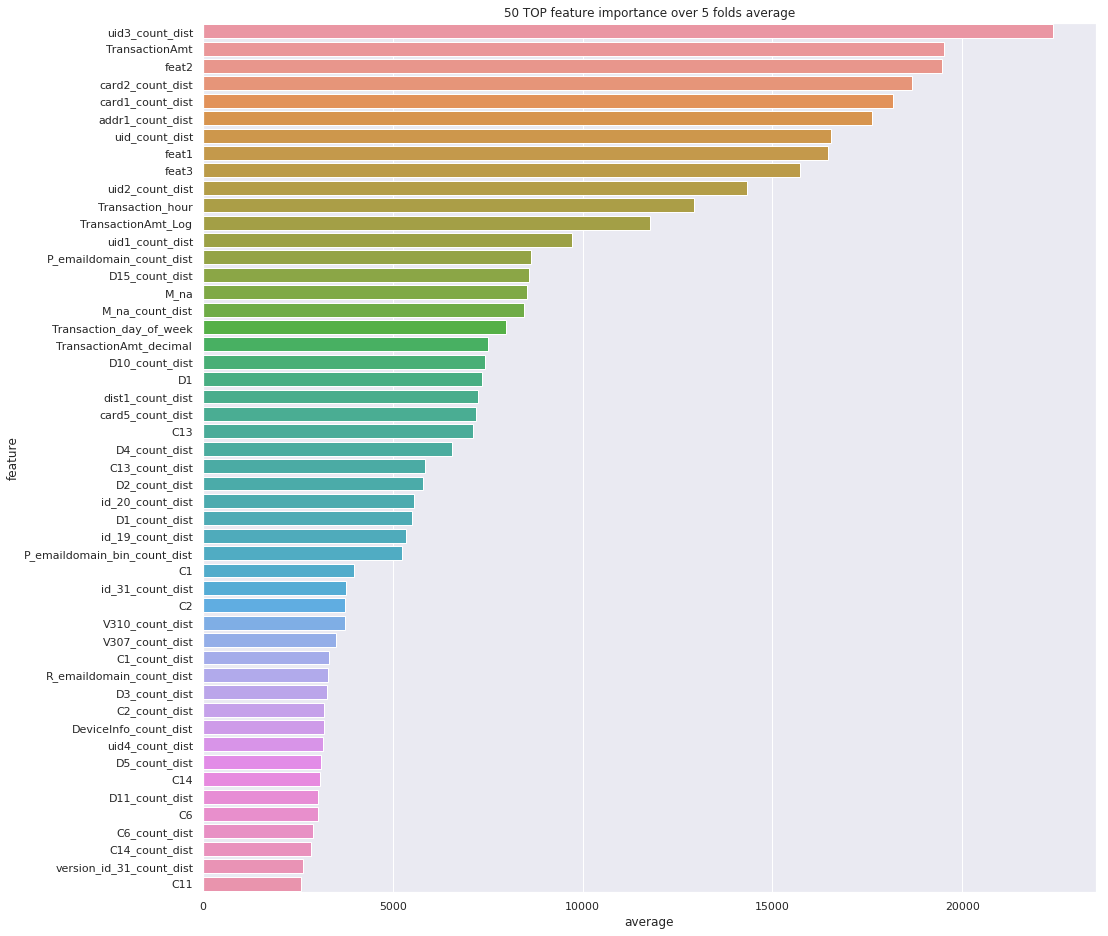

In [69]:
feature_importances['average'] = feature_importances[['fold_{}'.format(fold + 1) for fold in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));

In [70]:
# clf right now is the last model, trained with 80% of data and validated with 20%
best_iter = clf.best_iteration

**Submission**

In [71]:
clf = lgb.LGBMClassifier(**params, num_boost_round=best_iter)
clf.fit(X, y)

LGBMClassifier(bagging_fraction=0.4181193142567742, bagging_seed=11,
               boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               feature_fraction=0.3797454081646243, importance_type='split',
               learning_rate=0.006883242363721497, max_depth=-1, metric='auc',
               min_child_samples=20, min_child_weight=0.03454472573214212,
               min_data_in_leaf=106, min_split_gain=0.0, n_estimators=100,
               n_jobs=-1, num_boost_round=1524, num_leaves=491,
               objective='binary', random_state=47,
               reg_alpha=0.3899927210061127, reg_lambda=0.6485237330340494,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0, verbosity=-1)

In [72]:
sub['isFraud'] = clf.predict_proba(test)[:, 1]

In [73]:
sub.to_csv('ieee_cis_fraud_detection_new.csv', index=False)